<center><h1>Ye_Jinyi_HW4</h1></center>
<br>
<br>

Name: Jinyi Ye
<br>
Github Username: angelayejinyi
<br>
USC ID: 1552624974

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

Get the AReM Data Set

In [2]:
# read the datasets into a dictionary
from natsort import natsorted

d = {}   

for root, dirs, files in os.walk('/scratch2/jinyiy/data/AReM'):
    for name in natsorted(files):
        #print(name)
        df = pd.read_csv(os.path.join(root, name), skiprows=4, sep=',')
        #print(os.path.join(root, name))
        d[os.path.join(root, name)] = df

### (b) Test and Train Data

In [3]:
test_dict = {}
test_file_lst = ['/scratch2/jinyiy/data/AReM/bending1/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/bending1/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/bending2/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/bending2/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/cycling/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/cycling/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/cycling/dataset3.csv',
                '/scratch2/jinyiy/data/AReM/lying/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/lying/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/lying/dataset3.csv',
                '/scratch2/jinyiy/data/AReM/sitting/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/sitting/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/sitting/dataset3.csv',
                '/scratch2/jinyiy/data/AReM/standing/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/standing/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/standing/dataset3.csv',
                '/scratch2/jinyiy/data/AReM/walking/dataset1.csv',
                '/scratch2/jinyiy/data/AReM/walking/dataset2.csv',
                '/scratch2/jinyiy/data/AReM/walking/dataset3.csv']
for key in test_file_lst:
    test_dict[key] = d[key]

train_dict = {}
for key,value in d.items():
    train_dict[key] = d[key]
for key in test_file_lst:
    train_dict.pop(key)

### (c) Feature Extraction

#### i. Research

Mean: The average value of the time series data.

Standard deviation: A measure of the spread of the time series data around the mean.

Maximum and minimum values: The highest and lowest values in the time series data.

Median: The middle value of the time series data when it is sorted in ascending or descending order.

Range: The difference between the maximum and minimum values.

Interquartile range (IQR): A measure of the spread of the time series data that is calculated as the difference between the 75th and 25th percentiles.

Kurtosis: A measure of the "peakedness" of the distribution of the time series data, relative to a normal distribution.

Skewness: A measure of the asymmetry of the distribution of the time series data around the mean.

Root mean square (RMS): The square root of the mean of the squares of the time series data.

Autocorrelation: A measure of the correlation between a time series and a lagged version of itself.

#### ii. Extraction

In [4]:
summary_df = pd.DataFrame(columns=['Instance', 'min1', 'max1', 'mean1', 'median1', 'std1', 'first_quart1', 'third_quart1',
                                    'min2', 'max2', 'mean2', 'median2', 'std2', 'first_quart2', 'third_quart2',
                                    'min3', 'max3', 'mean3', 'median3', 'std3', 'first_quart3', 'third_quart3',
                                    'min4', 'max4', 'mean4', 'median4', 'std4', 'first_quart4', 'third_quart4',
                                    'min5', 'max5', 'mean5', 'median5', 'std5', 'first_quart5', 'third_quart5',
                                    'min6', 'max6', 'mean6', 'median6', 'std6', 'first_quart6', 'third_quart6','label'])
i = 0

for key,value in natsorted(d.items()):
    #print(key)
    for n in range(1,7):
        globals()['min%s' % n] = value.iloc[:,n].min()
        globals()['max%s' % n] = value.iloc[:,n].max()
        globals()['mean%s' % n] = value.iloc[:,n].mean()
        globals()['median%s' % n] = value.iloc[:,n].median()
        globals()['std%s' % n] = value.iloc[:,n].std()
        globals()['first_quart%s' % n] = value.iloc[:,n].quantile(.25)
        globals()['third_quart%s' % n] = value.iloc[:,n].quantile(.75)
    label = (key.split('data/AReM/'))[1].split('/dataset')[0]
    i += 1
    summary_df.loc[len(summary_df.index)] = [int(i), min1, max1, mean1, median1, std1, first_quart1, third_quart1,
                                                min2, max2, mean2, median2, std2, first_quart2, third_quart2,
                                                min3, max3, mean3, median3, std3, first_quart3, third_quart3,
                                                min4, max4, mean4, median4, std4, first_quart4, third_quart4,
                                                min5, max5, mean5, median5, std5, first_quart5, third_quart5,
                                                min6, max6, mean6, median6, std6, first_quart6, third_quart6, label]

In [5]:
summary_df['Instance'] = summary_df['Instance'].astype(int)
summary_df

,Instance,min1,max1,mean1,median1,std1,first_quart1,third_quart1,min2,max2,...,first_quart5,third_quart5,min6,max6,mean6,median6,std6,first_quart6,third_quart6,label
0,1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,...,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000,bending1
1,2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,...,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000,bending1
2,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,...,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1
3,4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,...,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1
4,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,...,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,...,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking
84,85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,...,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking
85,86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,...,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking
86,87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,...,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking


#### iii. Standard Deviation

In [8]:
from scipy import stats

# bootstrapping to find confidence interval
def draw_bs_replicates(data,func,size):
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

# reference: https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d

In [11]:
# calculate the standard deviation for each column
std_dev = np.std(summary_df, axis=0)
print(std_dev)

Instance        25.401772
min1             9.515445
max1             4.369322
mean1            5.305314
median1          5.409056
std1             1.762056
first_quart1     6.118526
third_quart1     5.109643
min2             0.000000
max2             5.033882
mean2            1.565194
median2          1.404197
std2             0.879068
first_quart2     0.940994
third_quart2     2.113157
min3             2.939616
max3             4.847358
mean3            3.985540
median3          4.013397
std3             0.941316
first_quart3     4.196608
third_quart3     4.147858
min4             0.000000
max4             2.171183
mean4            1.159470
median4          1.139058
std4             0.455631
first_quart4     0.838813
third_quart4     1.543658
min5             6.089107
max5             5.708524
mean5            5.643253
median5          5.780655
std5             1.019058
first_quart5     6.061727
third_quart5     5.500200
min6             0.045577
max6             2.504568
mean6       

In [12]:
std_df = pd.DataFrame(columns=['feature','std'])

for column in summary_df.iloc[:,1:43].columns:
    #print(column)
    bs_replicates = draw_bs_replicates(summary_df[column], np.std, 10000)
    conf_interval = np.nanpercentile(bs_replicates,[5,95])
    std_df.loc[len(std_df)] = [column, np.around(conf_interval,3)]

In [13]:
std_df

,feature,std
0,min1,"[8.22, 10.713]"
1,max1,"[3.307, 5.272]"
2,mean1,"[4.682, 5.83]"
3,median1,"[4.757, 5.961]"
4,std1,"[1.56, 1.939]"
5,first_quart1,"[5.536, 6.619]"
6,third_quart1,"[4.31, 5.808]"
7,min2,"[0.0, 0.0]"
8,max2,"[4.602, 5.378]"
9,mean2,"[1.39, 1.697]"


#### iv. Select Features

Intuitively, the features that are most distinguishable between classes should have relatively large standard deviation, which suggests significant differences between classess. Besides, the 90% confidence interval should be relatively dispersed, which indicates that the data points are unevenly and widely distributed. 

Following the above criteria, I thus select <b>max, mean and third quartile</b> as the top3 features.

## 4. Time Series Classification Part 2: Binary and Multiclass Classification

In order to answer the below questions in a more sufficient way, we first write a function that splits data into l time series and calculates the features.

In [4]:
# a function that splits data into l timeseries
def split_data(dataset,l=1):
    # set the column names for split dataframe
    feature = ['max','mean','third_quart']
    time_series = [1,2,3,4,5,6]
    column_names = []
    for k in range(1,l+1):
        for i in time_series:
            for f in feature:
                column_names.append(f+str(i)+'_'+str(k))
    column_names.append('label')
    #print(column_names)

    # split data into l timeseries
    l_fold_summary_df = pd.DataFrame(columns=column_names)
    for key,value in natsorted(dataset.items()):
        df_split = np.array_split(value, l)
        row_data = []
        for i in range(l):
            for j in range(6):
                max = df_split[i].iloc[:,j+1].max()
                mean = df_split[i].iloc[:,j+1].mean()
                third_quart = df_split[i].iloc[:,j+1].quantile(.75)
                row_data.extend([max,mean,third_quart])
        label = (key.split('data/AReM/'))[1].split('/dataset')[0]
        row_data.append(label)
            
        l_fold_summary_df.loc[len(l_fold_summary_df.index)] = row_data
    
    return l_fold_summary_df

### (a) Binary Classification Using Logistic Regression

#### i. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [17]:
# get the dataframe for plotting
summary_df_1fold = split_data(train_dict,l=1)
feature = ['max','mean','third_quart']
time_series = [1,2,6]
column_names = []
for i in time_series:
    for f in feature:
        column_names.append(f+str(i)+'_1')
column_names.append('label')
selected_feature_df = summary_df_1fold[column_names]
selected_feature_df['label'] = selected_feature_df['label'].apply(lambda x: 'bending' if 'bending' in x else 'non-bending')
selected_feature_df

/tmp/SLURM_13919621/ipykernel_44122/238748072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_feature_df['label'] = selected_feature_df['label'].apply(lambda x: 'bending' if 'bending' in x else 'non-bending')


,max1_1,mean1_1,third_quart1_1,max2_1,mean2_1,third_quart2_1,max6_1,mean6_1,third_quart6_1,label
0,47.40,43.954500,45.0000,1.70,0.426250,0.5000,1.79,0.493292,0.9400,bending
1,47.75,42.179812,45.0000,3.00,0.696042,1.1200,2.18,0.613521,1.0000,bending
2,45.75,41.678063,42.7500,2.83,0.535979,0.7100,1.79,0.383292,0.5000,bending
3,48.00,43.454958,45.0000,1.58,0.378083,0.5000,5.26,0.679646,0.8700,bending
4,48.00,43.969125,44.6700,1.50,0.413125,0.5000,2.96,0.555312,0.8300,bending
...,...,...,...,...,...,...,...,...,...,...
64,45.33,33.586875,37.0000,14.67,4.576562,6.1050,8.32,3.259729,4.3225,non-bending
65,45.50,34.322750,38.0000,13.47,4.456333,5.9700,9.67,3.432563,4.5650,non-bending
66,46.00,34.546229,37.8125,12.47,4.371958,5.8000,10.00,3.338125,4.3350,non-bending
67,46.25,34.873229,38.2500,14.82,4.380583,5.9325,9.51,3.424646,4.5000,non-bending


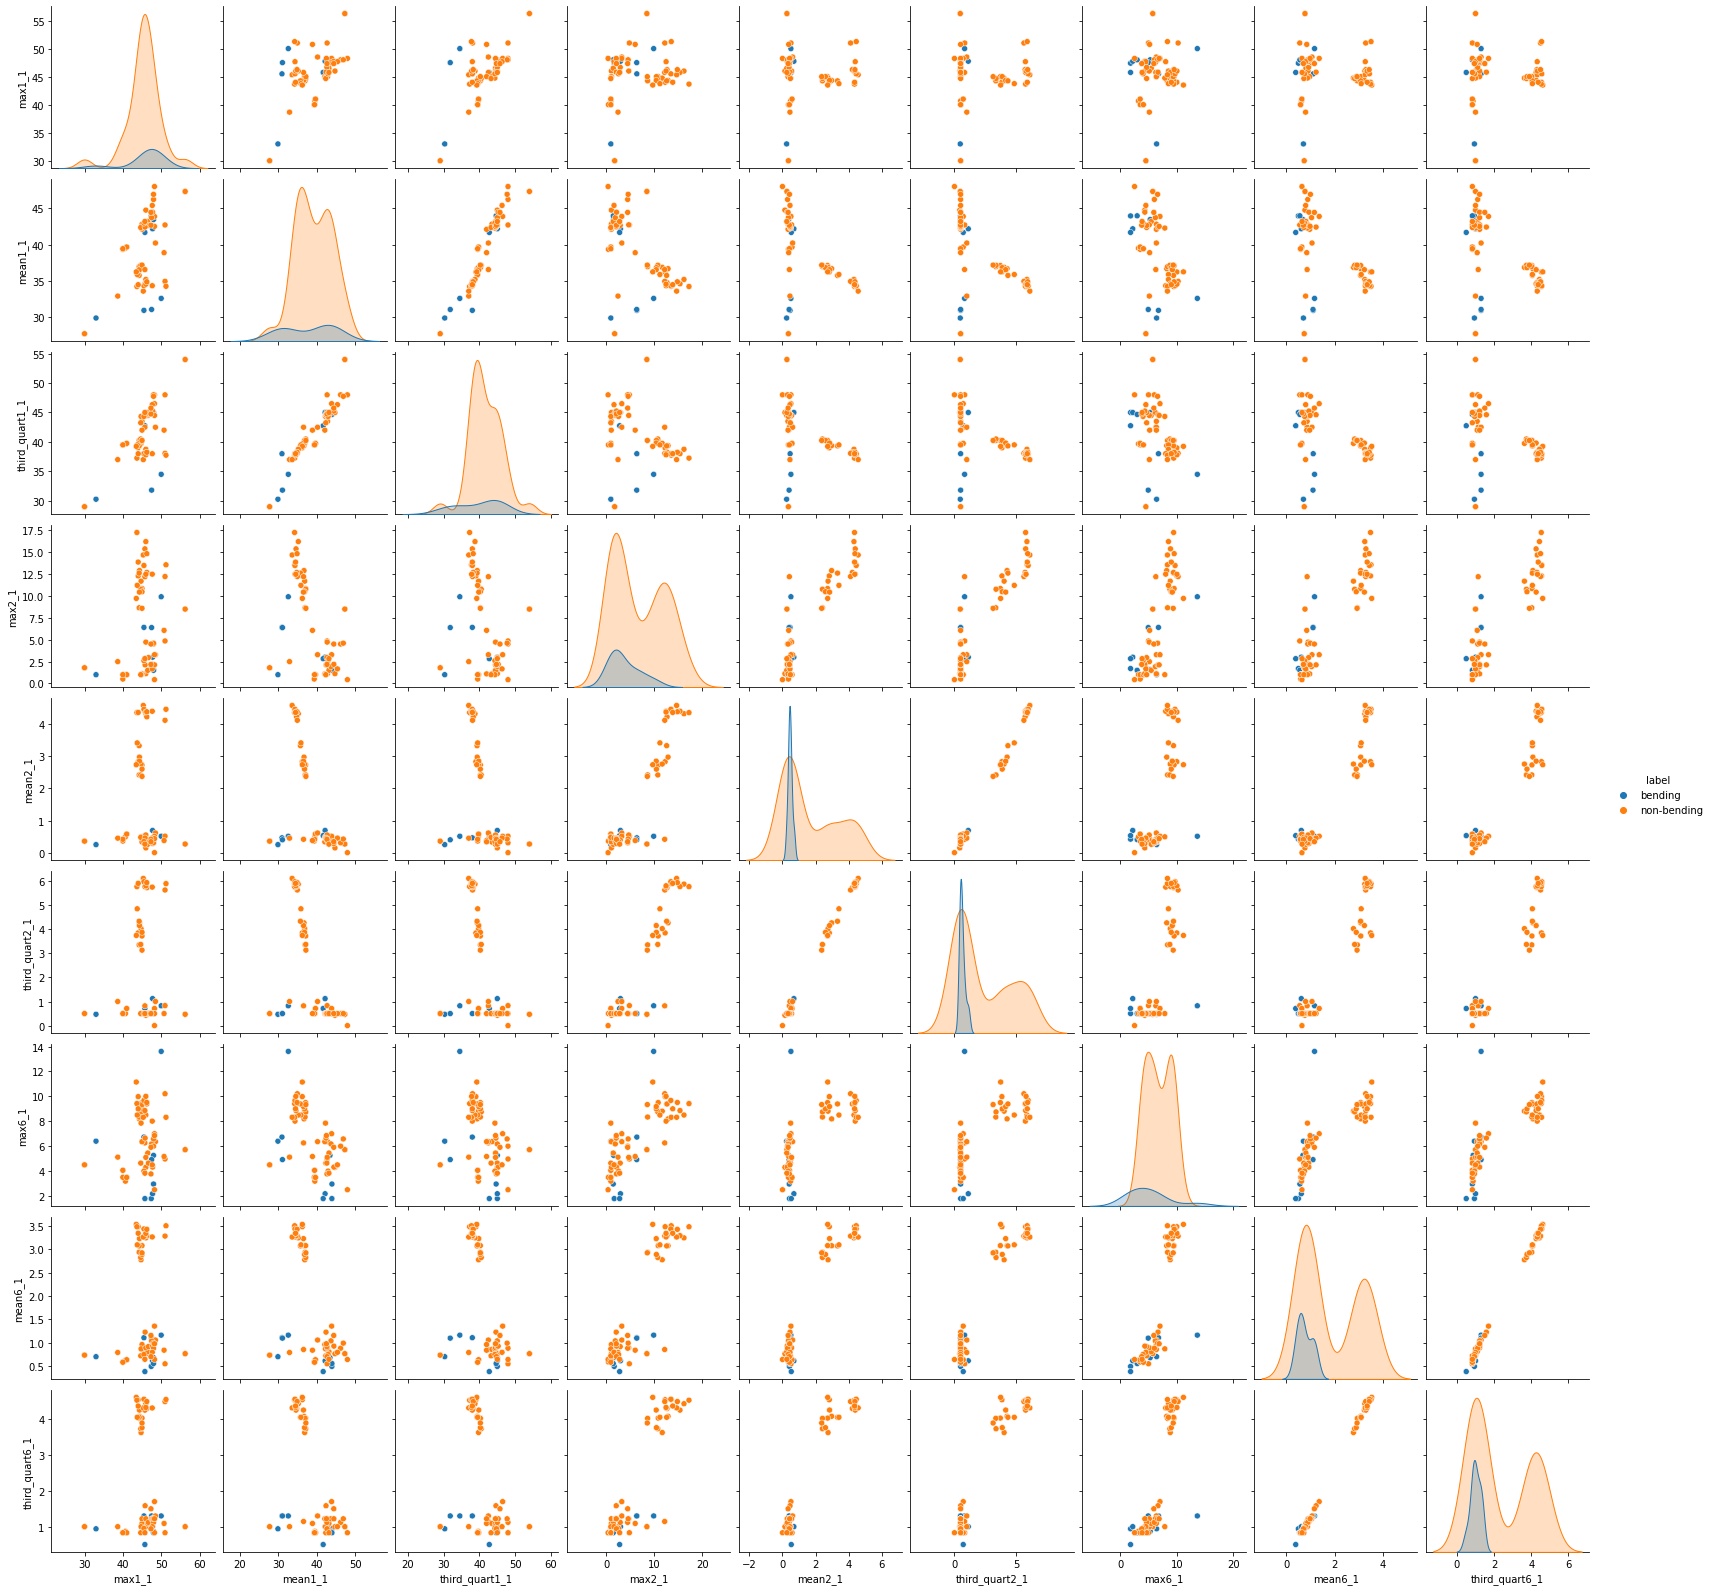

In [18]:
sns.pairplot(selected_feature_df, hue='label')
plt.show()

#### ii. Break each time series in your training set into two (approximately) equal length time series. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i?

In [19]:
# get the dataframe with 18 features
summary_df_2fold = split_data(train_dict,l=2)

feature = ['max','mean','third_quart']
time_series = [1,2,6]
column_names = []
for k in range(1,3):
    for i in time_series:
        for f in feature:
            column_names.append(f+str(i)+'_'+str(k))

column_names.append('label')

selected_feature_df2 = summary_df_2fold[column_names]
selected_feature_df2['label'] = selected_feature_df2['label'].apply(lambda x: 'bending' if 'bending' in x else 'non-bending')
selected_feature_df2

/tmp/SLURM_13919621/ipykernel_44122/3400671120.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_feature_df2['label'] = selected_feature_df2['label'].apply(lambda x: 'bending' if 'bending' in x else 'non-bending')


,max1_1,mean1_1,third_quart1_1,max2_1,mean2_1,third_quart2_1,max6_1,mean6_1,third_quart6_1,max1_2,mean1_2,third_quart1_2,max2_2,mean2_2,third_quart2_2,max6_2,mean6_2,third_quart6_2,label
0,46.50,44.057167,45.0000,1.50,0.381042,0.5000,1.79,0.598250,1.0000,47.40,43.851833,45.00,1.70,0.471458,0.5000,1.50,0.388333,0.7100,bending
1,47.75,43.278875,45.2500,3.00,0.673292,1.0000,1.53,0.640958,1.2200,46.00,41.080750,44.50,2.86,0.718792,1.2275,2.18,0.586083,0.8700,bending
2,45.75,41.621208,44.2500,2.83,0.623083,0.8300,1.79,0.419083,0.7100,43.67,41.734917,42.00,1.12,0.448875,0.5000,1.50,0.347500,0.5000,bending
3,48.00,44.117042,45.0000,1.30,0.250042,0.5000,5.26,0.815417,1.1200,46.50,42.792875,43.00,1.58,0.506125,0.5000,4.06,0.543875,0.7100,bending
4,45.00,43.486208,44.5000,1.30,0.378667,0.5000,2.28,0.524875,0.8300,48.00,44.452042,44.75,1.50,0.447583,0.5000,2.96,0.585750,0.8300,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,45.00,33.334500,36.8125,11.78,4.408083,5.8700,8.29,3.229167,4.2450,45.33,33.839250,37.00,14.67,4.745042,6.4500,8.32,3.290292,4.4525,non-bending
65,44.50,34.036750,37.7500,13.47,4.778292,6.5050,8.41,3.543708,4.7900,45.50,34.608750,38.25,12.50,4.134375,5.4175,9.67,3.321417,4.3950,non-bending
66,43.33,34.033875,37.5000,12.47,4.574625,6.0300,10.00,3.244042,4.1500,46.00,35.058583,38.33,12.28,4.169292,5.5875,8.64,3.432208,4.5125,non-bending
67,44.00,34.920792,37.8125,14.82,4.177958,5.4550,9.18,3.430625,4.5850,46.25,34.825667,38.27,12.26,4.583208,6.2400,9.51,3.418667,4.4525,non-bending


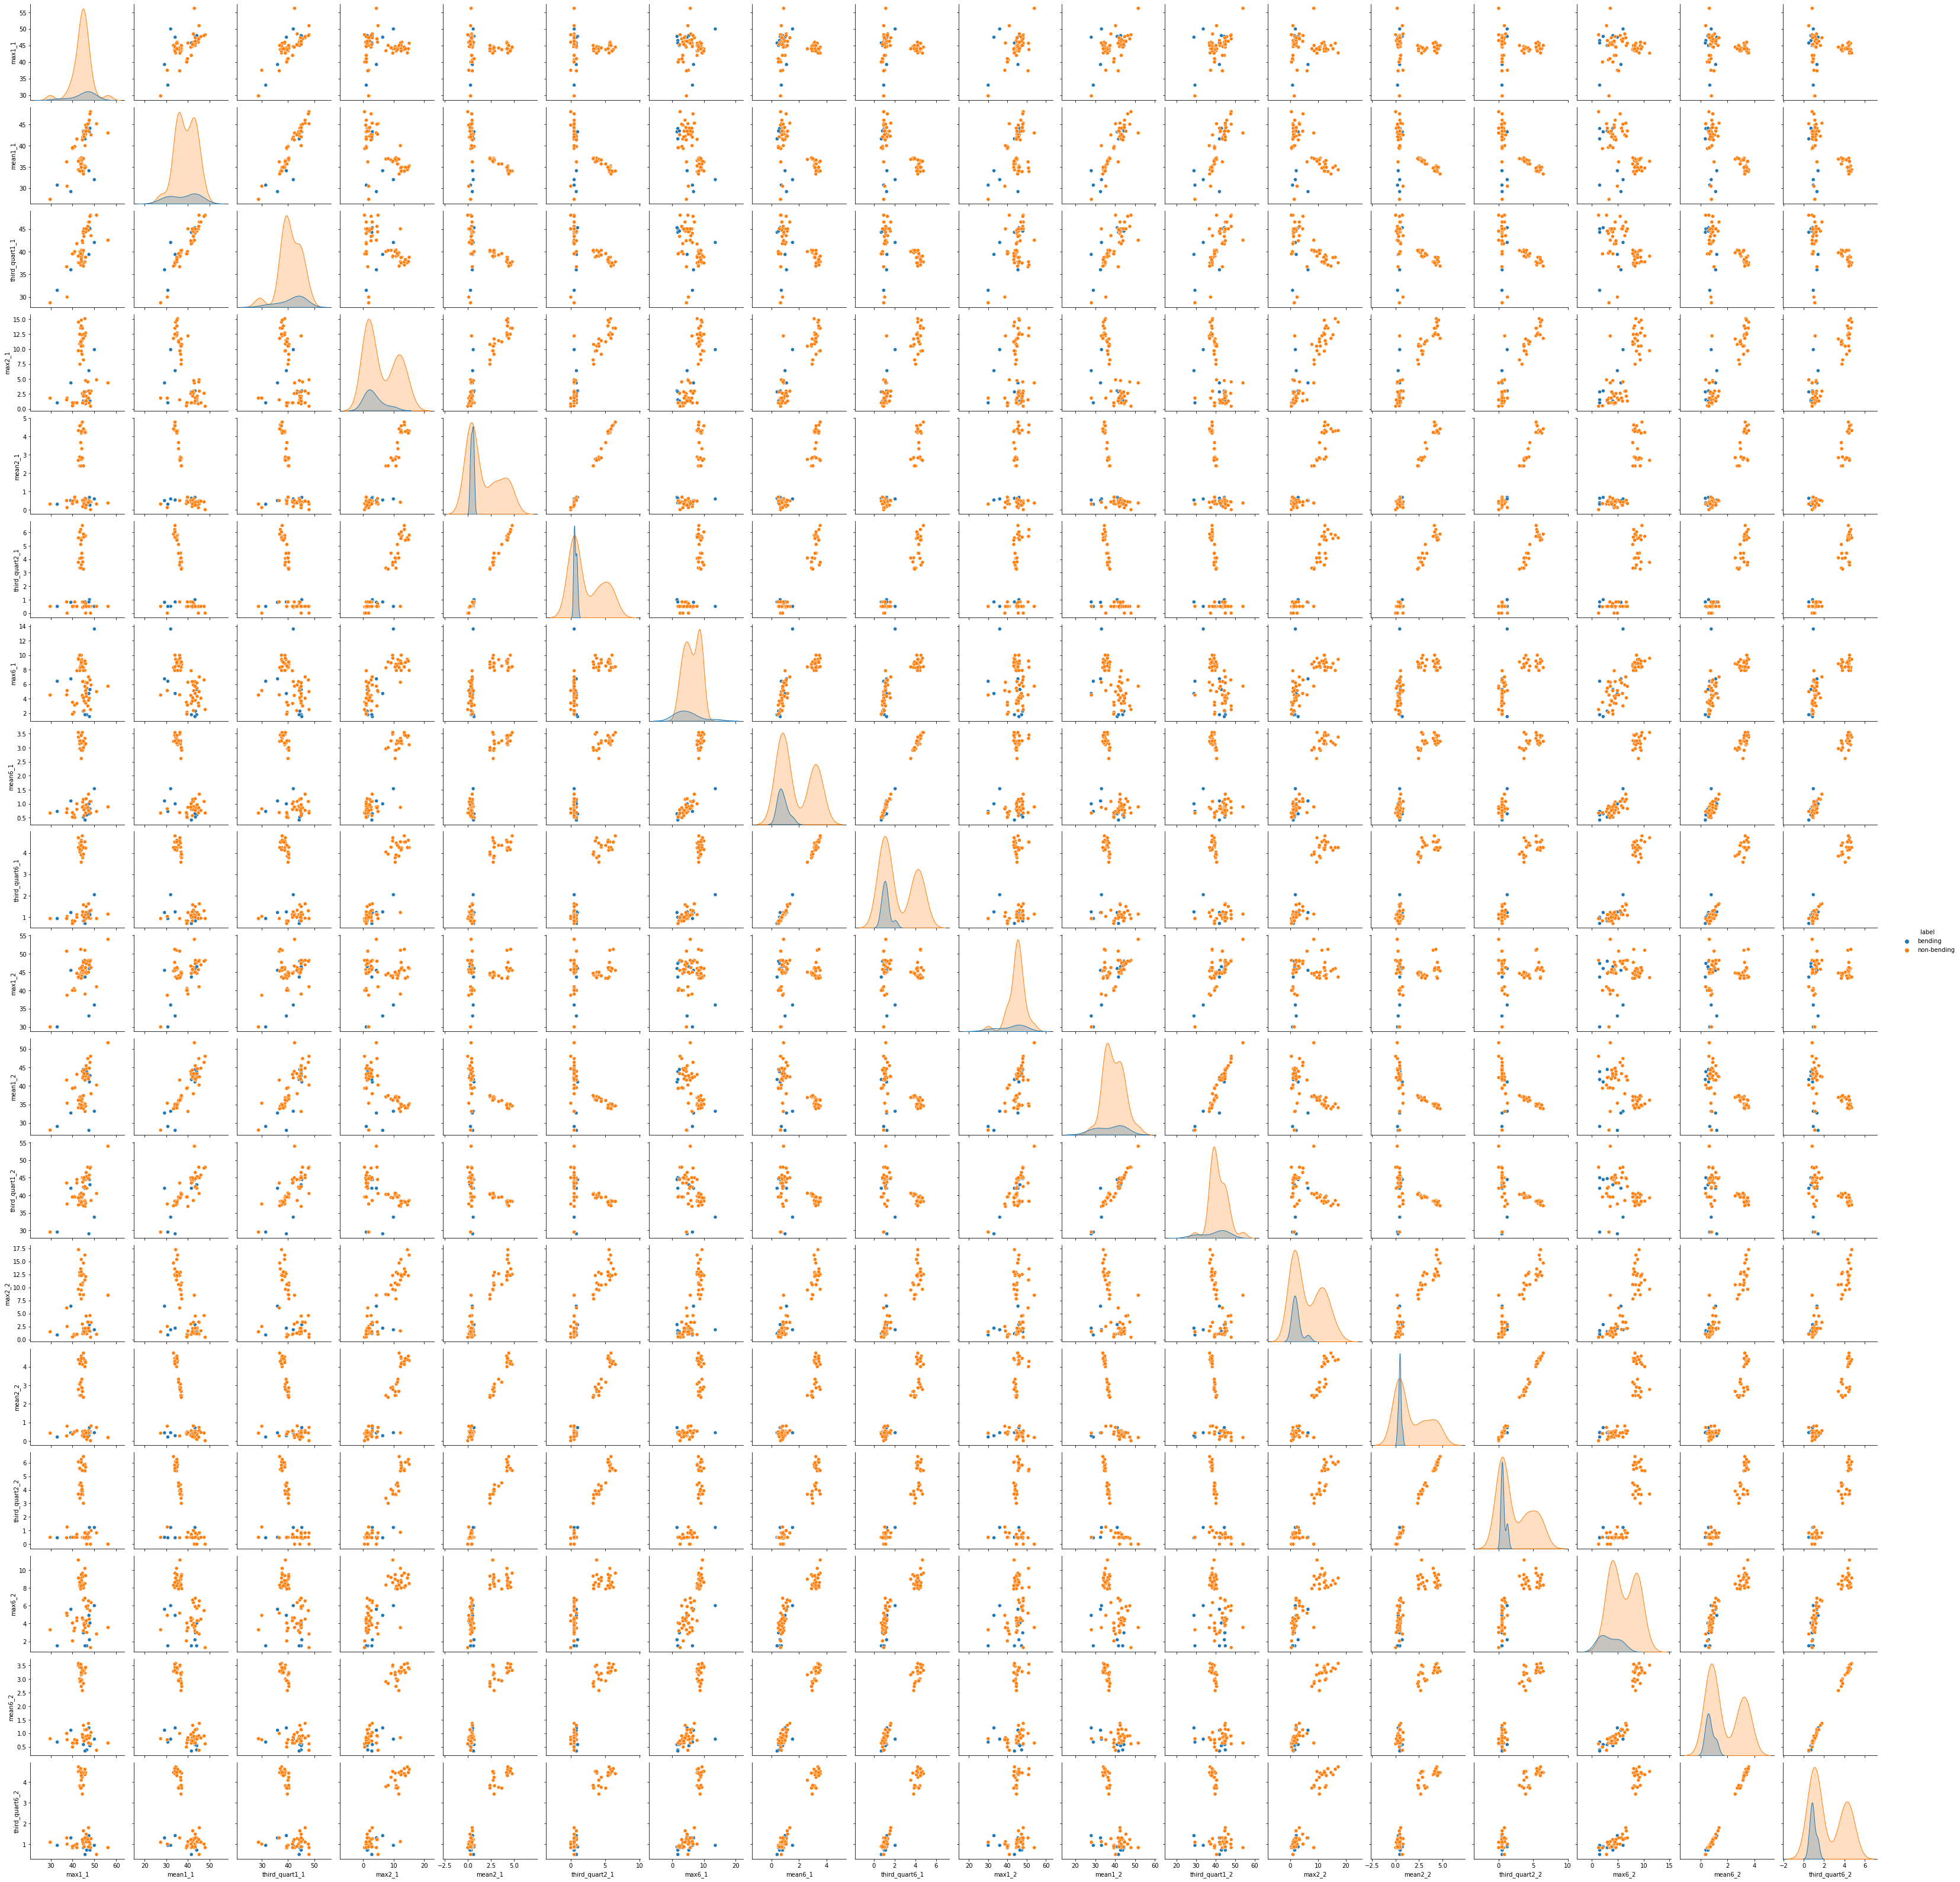

In [20]:
# get the 18*18 pairplot
sns.pairplot(selected_feature_df2, hue='label')
plt.show()

Upon analyzing two graphs, it becomes apparent that while the distributions are not identical, they do appear quite similar at first glance.

#### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l. Use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination.

In [5]:
# logistic regression: https://www.datacamp.com/tutorial/understanding-logistic-regression-python
# feature selection: https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e
# StratifiedKFold cross validation: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import statsmodels.api as sm

In [22]:
lp_df = pd.DataFrame()
lp_df[['(l,p)','accuracy']] = None

for i in range(1,21):
    summary_df_lfold = split_data(train_dict,l=i)
    summary_df_lfold['label'] = summary_df_lfold['label'].apply(lambda x: 1 if 'bending' in x else 0)

    # get x,y
    X_train = summary_df_lfold.iloc[:,:-1]
    y_train = summary_df_lfold.iloc[:,-1]

    # Create a logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Use RFECV for feature selection with StratifiedKFold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(X_train, y_train)

    p = rfecv.n_features_
    acc = np.around(max(rfecv.cv_results_['mean_test_score']), 4)

    # Print the results of feature selection
    print("l =", i)
    print("Optimal number of features:", p)
    print("Selected features:", str(X_train.columns[rfecv.support_]))
    print("Cross-validation accuracy score:", acc)

    # add l,p pair to a table
    lp_df.loc[len(lp_df.index)] = [(i,p), acc]

    # get the p values by fitting the model with selected features using statsmodels
    X = X_train[X_train.columns[rfecv.support_]]
    y = y_train
    sm_model = sm.Logit(y, sm.add_constant(X))
    result = sm_model.fit(method='bfgs', disp=False)
    #print(result.summary())
    print("P-values of regression coefficients:", [result.pvalues[i] for i in range(len(result.pvalues))])
    print("\n")

    i += 1

l = 1
Optimal number of features: 5
Selected features: Index(['third_quart1_1', 'mean3_1', 'max5_1', 'mean5_1', 'third_quart5_1'], dtype='object')
Cross-validation accuracy score: 0.9857
P-values of regression coefficients: [0.9999998447540289, 0.9999800076765376, 0.9997885011181575, 0.9999641576170972, 0.9999930889797312, 0.999999454791223]


l = 2
Optimal number of features: 11
Selected features: Index(['mean1_1', 'max2_1', 'mean3_1', 'third_quart3_1', 'max5_1', 'mean5_1',
       'third_quart5_1', 'mean1_2', 'mean5_2', 'third_quart5_2', 'max6_2'],
      dtype='object')
Cross-validation accuracy score: 0.9714
P-values of regression coefficients: [0.9999999800420454, 0.9999999610630548, 0.9999996949871727, 0.9999999610114045, 0.9999999605966405, 0.9999994537008563, 0.9999999371204356, 0.999999927749781, 0.9999998095891109, 0.9999998706312209, 0.9999999419796578, 0.9999995291046503]


l = 3
Optimal number of features: 1
Selected features: Index(['mean5_1'], dtype='object')
Cross-validat

In [23]:
lp_df

,"(l,p)",accuracy
0,"(1, 5)",0.9857
1,"(2, 11)",0.9714
2,"(3, 1)",0.9714
3,"(4, 5)",0.9714
4,"(5, 7)",0.9857
5,"(6, 5)",0.9714
6,"(7, 14)",0.9857
7,"(8, 31)",0.9857
8,"(9, 7)",0.9571
9,"(10, 1)",0.9560


From the results, we can conclude that the (l,p) pair (1,5) yields best cv accuracy at 0.9857 with least features (model complexity).

#### Explain what the right way and the wrong way are to perform cross-validation in this problem.

Right way: Feature selection should haven been done inside each CV loop to avoid data leakage. Meaning that we should first divide data into k folds and then perform feature selection on each training set (k-1 folds) and validate the model on the test set (unseen data).

Wrong way: You first perform the feature selection strategy on the entire dataset to select the top k features, then do cross-validation and feed the data with selected features into the CV loop to estimate the model performance. In this way, there is a mistake of data leakage, meaning the model has already "seen" the data while training.

Reference: https://towardsdatascience.com/how-cross-validation-can-go-wrong-and-how-to-fix-it-feature-selection-use-case-with-sample-code-abf928be9080

#### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [6]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        20:45:01   Log-Likelihood:            -2.1343e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.738e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7239   8.86e+06  -1.95e-07      1.000   -1.74e+07    1.74e+07
third_quart1_1    -6.0032    2.4e+05  -2.51e-05      1.000    -4.7e+05     4.7e+05
mean3_1           -4.5616   1.72e+04

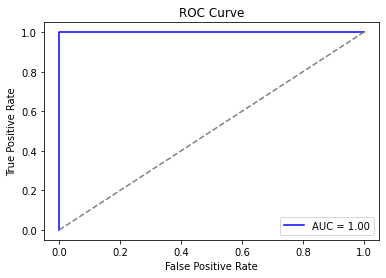

In [25]:
# train the model with (l,p)=(18,6), and with selected features
summary_df_1fold = split_data(train_dict,l=1)
summary_df_1fold['label'] = summary_df_1fold['label'].apply(lambda x: 1 if 'bending' in x else 0)

X_train = summary_df_1fold[['third_quart1_1', 'mean3_1', 'max5_1', 'mean5_1', 'third_quart5_1']]
y_train = summary_df_1fold.iloc[:,-1]

sm_model = sm.Logit(y_train, sm.add_constant(X_train))
result = sm_model.fit(method='bfgs', disp=False)
print(result.summary())
print("P-values of regression coefficients:", [result.pvalues[i] for i in range(len(result.pvalues))])

# make predictions on the train data
y_pred_train = (result.predict(sm.add_constant(X_train)) > 0.5).astype(int)

# calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_train, y_pred_train)
auc_sklearn = auc(fpr, tpr)

# Plot ROC curves
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_sklearn:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### v. Test the classifier on the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [26]:
# break the time series in test set into the same number of time series (l=18)
test_df_1fold = split_data(test_dict,l=1)
test_df_1fold['label'] = test_df_1fold['label'].apply(lambda x: 1 if 'bending' in x else 0)

X_test = test_df_1fold[['third_quart1_1', 'mean3_1', 'max5_1', 'mean5_1', 'third_quart5_1']]
y_test = test_df_1fold.iloc[:,-1]

# make predictions on the test data
y_pred = (result.predict(sm.add_constant(X_test)) > 0.5).astype(int)

# Calculate the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy: ", accuracy)

Accuracy:  1.0


The accuracy on the test set is 1.0, same as 1.0 train cross-validation accuracy obtained previously.

#### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes. The summary of statmodels has following statement: "Complete Separation: The results show that there is complete separation." In this case the Maximum Likelihood Estimator does not exist and the parameters are not identified.

This can happen when there is a predictor variable that completely predicts the outcome variable without any errors. As a result, the logistic regression model can perfectly classify all observations, leading to infinite or undefined parameter estimates.

In such cases, the p-values of the regression coefficients can be very large, often greater than 0.05 or even 1.0. This is because the standard errors of the coefficients are very large due to the perfect separation, which results in a wide confidence interval and a high p-value. In other words, the p-value may not be meaningful in this context because the model is not properly estimated.

In cases of complete separation, it is generally recommended to use alternative models that can handle such situations. These may include penalized regression techniques such as Ridge, Lasso, or Elastic Net regression, or Bayesian methods that use informative priors. Another option is to remove the predictor variable(s) that cause the complete separation, if possible.

#### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes. The confusion matrix indicates that the non-bending class (which has a label of 0) has a considerably larger number of samples than the bending class (which has a label of 1), with 60 and 9 samples, respectively.

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
lp_df2 = pd.DataFrame()
lp_df2[['(l,p)','accuracy']] = None

for i in range(1,21):
    summary_df_lfold = split_data(train_dict,l=i)
    summary_df_lfold['label'] = summary_df_lfold['label'].apply(lambda x: 1 if 'bending' in x else 0)

    # get x,y
    X_train = summary_df_lfold.iloc[:,:-1]
    y_train = summary_df_lfold.iloc[:,-1]

    # resample minority class from 9 to 60
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

    # Create a logistic regression model
    model = LogisticRegression(max_iter=500)
    warnings.filterwarnings("ignore")

    # Use RFECV for feature selection with StratifiedKFold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(X_resampled, y_resampled)

    p = rfecv.n_features_
    acc = np.around(max(rfecv.cv_results_['mean_test_score']), 4)

    # Print the results of feature selection
    print("l =", i)
    print("Optimal number of features:", p)
    print("Selected features:", str(X_resampled.columns[rfecv.support_]))
    print("Cross-validation accuracy score:", acc)

    # add l,p pair to a table
    lp_df2.loc[len(lp_df2.index)] = [(i,p), acc]

    # get the p values by fitting the model with selected features using statsmodels
    X = X_resampled[X_resampled.columns[rfecv.support_]]
    y = y_resampled
    sm_model = sm.Logit(y, sm.add_constant(X))
    result = sm_model.fit(method='bfgs', disp=False)
    #print(result.summary())
    print("P-values of regression coefficients:", [result.pvalues[i] for i in range(len(result.pvalues))])
    print("\n")

    i += 1


l = 1
Optimal number of features: 10
Selected features: Index(['mean1_1', 'third_quart1_1', 'max2_1', 'mean3_1', 'third_quart3_1',
       'max5_1', 'mean5_1', 'third_quart5_1', 'max6_1', 'third_quart6_1'],
      dtype='object')
Cross-validation accuracy score: 1.0
P-values of regression coefficients: [0.9999989983154722, 0.9999971351887799, 0.9999944556864869, 0.9999973847569906, 0.9999991361944661, 0.9999942465525047, 0.9998300459752207, 0.9999839528742238, 0.9999958367231857, 0.9999999497274148, 0.9999955850786209]


l = 2
Optimal number of features: 7
Selected features: Index(['max2_1', 'mean3_1', 'max5_1', 'mean5_1', 'third_quart5_1', 'mean1_2',
       'mean5_2'],
      dtype='object')
Cross-validation accuracy score: 0.9917
P-values of regression coefficients: [0.9999999700615998, 0.9999945973255966, 0.9999964833738831, 0.9999961549226498, 0.9999997768750608, 0.9999998379657734, 0.9999932892557061, 0.9999993980355013]


l = 3
Optimal number of features: 5
Selected features: Index(

In [35]:
lp_df2

,"(l,p)",accuracy
0,"(1, 10)",1.0000
1,"(2, 7)",0.9917
2,"(3, 5)",1.0000
3,"(4, 4)",0.9917
4,"(5, 6)",0.9917
5,"(6, 6)",0.9917
6,"(7, 6)",1.0000
7,"(8, 5)",0.9917
8,"(9, 6)",0.9917
9,"(10, 9)",0.9917


This time, we choose the model with less feature and highest accuracy (l,p)=(1,10).

In [8]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  120
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        21:02:05   Log-Likelihood:            -3.7597e-05
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 1.575e-30
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9039    7.2e+05  -1.26e-06      1.000   -1.41e+06    1.41e+06
mean1_1           -1.0171   2.83e+05  -3.59e-06      1.000   -5.55e+05    5.55e+05
third_quart1_1    -2.4118   3.47e+05

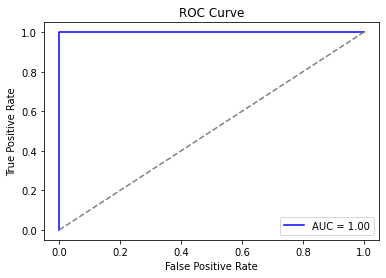

In [10]:
# train the model with (l,p)=(1,10), and with selected features
summary_df_1fold = split_data(train_dict,l=1)
summary_df_1fold['label'] = summary_df_1fold['label'].apply(lambda x: 1 if 'bending' in x else 0)

X_train = summary_df_1fold[['mean1_1', 'third_quart1_1', 'max2_1', 'mean3_1', 'third_quart3_1',
       'max5_1', 'mean5_1', 'third_quart5_1', 'max6_1', 'third_quart6_1']]
y_train = summary_df_1fold.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

sm_model = sm.Logit(y_resampled, sm.add_constant(X_resampled))
result = sm_model.fit(method='bfgs', disp=False)
print(result.summary())
print("P-values of regression coefficients:", [result.pvalues[i] for i in range(len(result.pvalues))])

# make predictions on the train data
y_pred_train = (result.predict(sm.add_constant(X_resampled)) > 0.5).astype(int)

# calculate the confusion matrix
cm = confusion_matrix(y_resampled, y_pred_train)
print("Confusion Matrix:\n", cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_resampled, y_pred_train)
auc = auc(fpr, tpr)

# Plot ROC curves
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Repeat 4(a)iii using L1-penalized logistic regression. 

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV

In [12]:
l1_df = pd.DataFrame()
l1_df[['l','C','train_acc','test_acc']] = None

for i in range(1,21):
    summary_df_lfold_train = split_data(train_dict,l=i)
    summary_df_lfold_train['label'] = summary_df_lfold_train['label'].apply(lambda x: 1 if 'bending' in x else 0)
    
    summary_df_lfold_test = split_data(test_dict,l=i)
    summary_df_lfold_test['label'] = summary_df_lfold_test['label'].apply(lambda x: 1 if 'bending' in x else 0)

    # get train and test data
    X_train = summary_df_lfold_train.iloc[:,:-1]
    y_train = summary_df_lfold_train.iloc[:,-1]
    X_test = summary_df_lfold_test.iloc[:,:-1]
    y_test = summary_df_lfold_test.iloc[:,-1]
    
    # normalize the data
    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

    # Create a logistic regression model with L1 penalty
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = LogisticRegressionCV(Cs=np.logspace(-4, 4, 10), penalty='l1', solver='liblinear', 
                                 cv=cv, scoring='roc_auc', n_jobs=-1)
    model.fit(X_train, y_train)
    
    # get the selected features
    selected_features = np.where(model.coef_ != 0)[1]

    # get the best L1 parameter C
    best_C = model.C_[0]
    
    # get train and test accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # print the selected features and the best C
    print("l =", i)
    print('Selected Features: ', selected_features)
    print('Best C: ', best_C)
    print('Train accuracy score: ', train_score)
    print('Test accuracy score: ', test_score)

    # add results to a table
    l1_df.loc[len(l1_df.index)] = [i, best_C, train_score, test_score]

    i += 1

l = 1
Selected Features:  [ 0  1  2  3  5  6  7  8  9 12 13 14 15 16 17]
Best C:  10000.0
Train accuracy score:  1.0
Test accuracy score:  1.0
l = 2
Selected Features:  [ 1 12 33 34 35]
Best C:  2.782559402207126
Train accuracy score:  1.0
Test accuracy score:  0.9666666666666667
l = 3
Selected Features:  [ 1  2  3 12 19 33 51 52]
Best C:  2.782559402207126
Train accuracy score:  1.0
Test accuracy score:  0.9833333333333334
l = 4
Selected Features:  [ 2 12 30 33 38 51 70]
Best C:  2.782559402207126
Train accuracy score:  1.0
Test accuracy score:  0.9833333333333334
l = 5
Selected Features:  [ 2  7 12 14 21 30 38 51 65 80]
Best C:  21.54434690031882
Train accuracy score:  1.0
Test accuracy score:  1.0
l = 6
Selected Features:  [  1   2   7  12  13  14  21  30  56  69  74  83  98 105]
Best C:  21.54434690031882
Train accuracy score:  1.0
Test accuracy score:  1.0
l = 7
Selected Features:  [  1  12  14  21  27  30  31  54  56  69  73  81  87 123]
Best C:  21.54434690031882
Train accuracy 

In [13]:
l1_df

,l,C,train_acc,test_acc
0,1.0,10000.000000,1.0,1.000000
1,2.0,2.782559,1.0,0.966667
2,3.0,2.782559,1.0,0.983333
3,4.0,2.782559,1.0,0.983333
4,5.0,21.544347,1.0,1.000000
5,6.0,21.544347,1.0,1.000000
6,7.0,21.544347,1.0,0.983333
7,8.0,2.782559,1.0,0.966667
8,9.0,2.782559,1.0,0.983333
9,10.0,21.544347,1.0,1.000000


We consider l=5 the optimal l, with train and test accuracy both equal to 1.0. We don't choose l=1, for a very large value of C can lead to overfitting and poor generalization performance.
Now, we train the model and fit it on test data.

Confusion Matrix Train:
 [[60  0]
 [ 0  9]]
Confusion Matrix Test:
 [[15  0]
 [ 0  4]]


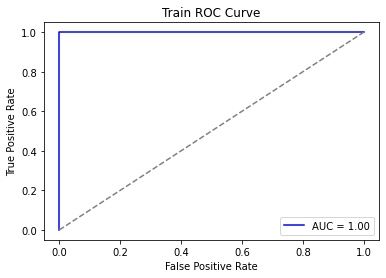

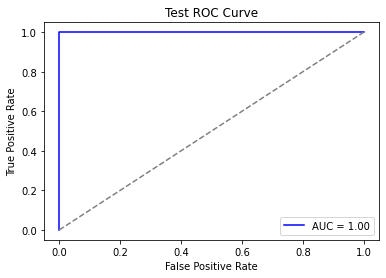

In [21]:
# train the model with l=5
summary_df_5fold_train = split_data(train_dict,l=5)
summary_df_5fold_train['label'] = summary_df_5fold_train['label'].apply(lambda x: 1 if 'bending' in x else 0)
    
summary_df_5fold_test = split_data(test_dict,l=5)
summary_df_5fold_test['label'] = summary_df_5fold_test['label'].apply(lambda x: 1 if 'bending' in x else 0)

# get train and test data with selected features
cols_to_select = [2,7,12,14,21,30,38,51,65,80]
X_train = summary_df_5fold_train.iloc[:,cols_to_select]
y_train = summary_df_5fold_train.iloc[:,-1]
X_test = summary_df_5fold_test.iloc[:,cols_to_select]
y_test = summary_df_5fold_test.iloc[:,-1]
    
# normalize the data
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Train L1-penalized logistic regression model on training set
best_c = 21.5443
model = LogisticRegression(penalty='l1', C=best_c, solver='liblinear')
model.fit(X_train, y_train)

# Predict outcomes of test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix Train:\n", cm)
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix Test:\n", cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_train, y_pred_train)
auc_sklearn = auc(fpr, tpr)

# Plot ROC curves
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_sklearn:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC Curve')
plt.legend()
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc_sklearn = auc(fpr, tpr)

# Plot ROC curves
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_sklearn:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend()
plt.show()

#### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

Based on the cross-validation score that was recorded during the model iterations, it can be observed that the L1-penalized model has a slightly better performance compared to p-value method during cross-validation. Additionally, the model also achieved an excellent score of 1.0 accuracy on the test set.

In terms of implementation, L1-regularization is likely to be easier since it does not require manual selection of features based on p-values. The sharp edges of the L1 constraint function aid in the selection of features, as opposed to the intensive computation of p-values required in feature selection using p-values.

L1-penalized logistic regression is particularly useful when dealing with high-dimensional data, while variable selection based on p-values is more appropriate when the number of features is relatively small.

### (c) Multi-class Classification (The Realistic Case)

#### i. Find the best l in the same way as you found it in 4(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

In [ ]:
l1_multi_df = pd.DataFrame()
l1_multi_df[['l','C','train_acc','test_acc']] = None

for i in range(1,21):
    summary_df_lfold_train = split_data(train_dict,l=i)   
    summary_df_lfold_test = split_data(test_dict,l=i)
    
    # get train and test data
    X_train = summary_df_lfold_train.iloc[:,:-1]
    y_train = summary_df_lfold_train.iloc[:,-1]
    X_test = summary_df_lfold_test.iloc[:,:-1]
    y_test = summary_df_lfold_test.iloc[:,-1]
    
    # standardize the data
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
    
    # label the data
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)
    
    # oversample the data
    ros = RandomOverSampler(random_state=42)
    X_train, y_train = ros.fit_resample(X_train, y_train)

    # Create a logistic regression model with L1 penalty
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = LogisticRegressionCV(Cs=np.logspace(-4, 4, 10), penalty='l1', solver='liblinear', 
                                 cv=cv, multi_class='auto', scoring='roc_auc', max_iter=1000)
    model.fit(X_train, y_train)
    
    # get the selected features
    selected_features = np.where(model.coef_ != 0)[1]

    # get the best L1 parameter C
    best_C = model.C_[0]
    
    # get train and test accuracy
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_score = accuracy_score(y_train, y_pred_train)
    test_score = accuracy_score(y_test, y_pred_test)

    # print the selected features and the best C
    print("l =", i)
    print('Selected Features: ', selected_features)
    print('Best C: ', best_C)
    print('Train accuracy score: ', train_score)
    print('Test accuracy score: ', test_score)

    # add results to a table
    l1_multi_df.loc[len(l1_multi_df.index)] = [i, best_C, train_score, test_score]

    i += 1

l = 1
Selected Features:  [ 1 13 15  1  5 11 12 15  0  1  4  6 11 12  0  1  2  3  6  7  8 11 13 14
 15  0  1  2  3  4  7  8  9 12 13 14 15  1  7 11 12 14  4  6]
Best C:  0.3593813663804626
Train accuracy score:  0.9761904761904762
Test accuracy score:  0.8947368421052632
l = 2
Selected Features:  [ 1 13 15 31  1 12 15 19 22  4  6  9 11 12 17 18 22 24 29  8 14 24 26  0
  1  2  3  5  7  9 11 13 14 15 17 18 21 25 26 27 31 32 34  0  2  6  8  9
 10 12 13 15 20 24 25 26 29 30 33 22]
Best C:  0.3593813663804626
Train accuracy score:  0.9880952380952381
Test accuracy score:  0.7368421052631579
l = 3
Selected Features:  [ 1 13 14 19 31 33 36 49  1  2  7  9 12 15 19 20 23 26 29 30 47 48 49  4
  6  9 11 12 17 18 40 41 42 45 47  0  6  7  8 12 13 14 21 24 25 30 31 42
 43 44 49  0  1  2  3  5  6  7  8  9 11 12 13 14 15 16 18 19 20 21 22 23
 24 25 26 27 28 30 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48 49 50
 51 52 53  0  1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 

In [25]:
l1_multi_df

,l,C,train_acc,test_acc
0,1.0,0.359381,0.976190,0.894737
1,2.0,0.359381,0.988095,0.736842
2,3.0,0.359381,1.000000,0.684211
3,4.0,0.359381,1.000000,0.789474
4,5.0,0.359381,1.000000,0.736842
5,6.0,0.359381,1.000000,0.789474
6,7.0,0.359381,1.000000,0.789474
7,8.0,0.359381,1.000000,0.736842
8,9.0,0.359381,1.000000,0.736842
9,10.0,0.359381,1.000000,0.789474


We consider l=1 the optimal l, with highest test accuracy at 0.8947.
Now, we train the model and fit it on test data.

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc
from itertools import cycle

In [28]:
# write a function to plot ROC curves
def roccurve(y_test, y_pred):
    # Compute ROC curve and ROC area for each class
    n_classes = len(set(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        y_test_i = np.array([1 if x == i else 0 for x in y_test])
        y_pred_i = np.array([1 if x == i else 0 for x in y_pred])
        fpr[i], tpr[i], _ = roc_curve(y_test_i, y_pred_i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Binarize the labels
    y_bin = label_binarize(y_test, classes=range(n_classes))
    y_pred = label_binarize(y_pred, classes=range(n_classes))

    # Compute micro-average ROC curve
    fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Compute the macro-averaged ROC curve
    fpr_macro = dict()
    tpr_macro = dict()
    roc_auc_macro = dict()
    for i in range(n_classes):
        fpr_macro[i], tpr_macro[i], _ = roc_curve(y_bin[:, i], y_pred[:, i])
        roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

    # Compute the average macro-averaged ROC curve
    all_fpr = np.unique(np.concatenate([fpr_macro[i] for i in range(n_classes)]))
    mean_tpr_macro = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr_macro += np.interp(all_fpr, fpr_macro[i], tpr_macro[i])
    mean_tpr_macro /= n_classes
    roc_auc_macro_avg = auc(all_fpr, mean_tpr_macro)

    # Plot the ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_micro, tpr_micro, color='aqua',
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))
    plt.plot(all_fpr, mean_tpr_macro, color='navy', 
             label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro_avg))

    colors = cycle(['darkorange', 'darkgreen', 'salmon', 'darkred', 'darkblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_macro[i], tpr_macro[i], color=color, lw=0.5, linestyle='--',
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc_macro[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

Confusion matrix of test set:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


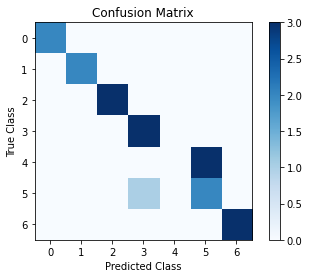

ROC curve of train set:


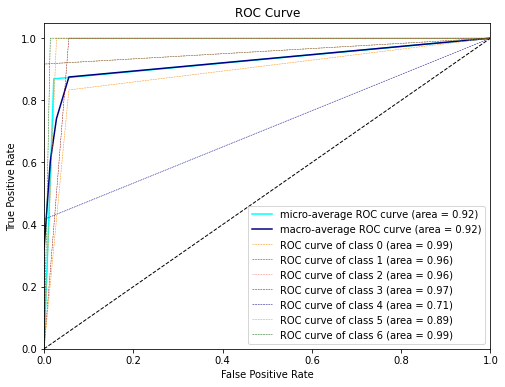

ROC curve of test set:


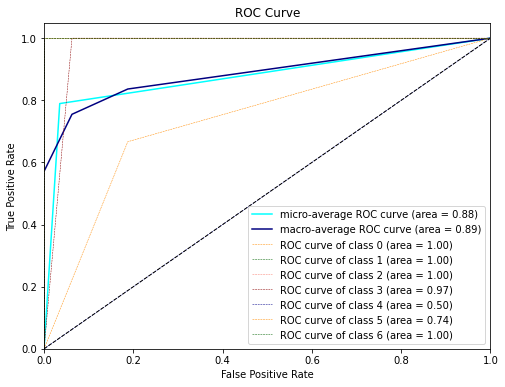

In [35]:
# train the model with l=1
summary_df_1fold_train = split_data(train_dict,l=1)
summary_df_1fold_test = split_data(test_dict,l=1)

# get train and test data with selected features
cols_to_select = [1,13,15,1,5,11,12,15,0,1,4,6,11,12,0,1,2,3,6,7,8,11,13,14,
                  15,0,1,2,3,4,7,8,9,12,13,14,15,1,7,11,12,14,4,6]
X_train = summary_df_1fold_train.iloc[:,cols_to_select]
y_train = summary_df_1fold_train.iloc[:,-1]
X_test = summary_df_1fold_test.iloc[:,cols_to_select]
y_test = summary_df_1fold_test.iloc[:,-1]
    
# standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
    
# label the data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
    
# oversample the data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Train L1-penalized logistic regression model on training set
best_c = 0.359381
model = LogisticRegression(penalty='l1', C=best_c, solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

# Predict outcomes of test set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix of test set:\n', cm)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, sorted(set(y_test)))
plt.yticks(tick_marks, sorted(set(y_test)))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print('ROC curve of train set:')
roccurve(y_train, y_pred_train)
print('ROC curve of test set:')
roccurve(y_test, y_pred_test)

#### ii. Repeat 4(c)i using a Naive Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [24]:
l1_nb_df = pd.DataFrame()
l1_nb_df[['l','GaussianNB_acc','MultinomialNB_acc','GaussianNB_auc','MultinomialNB_auc']] = None

for k in range(1,21):
    summary_df_lfold_train = split_data(train_dict,l=k)   
    summary_df_lfold_test = split_data(test_dict,l=k)
    
    # get train and test data
    X_train = summary_df_lfold_train.iloc[:,:-1]
    y_train = summary_df_lfold_train.iloc[:,-1]
    X_test = summary_df_lfold_test.iloc[:,:-1]
    y_test = summary_df_lfold_test.iloc[:,-1]
    
    # label the data
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)
    
    # oversample the data
    ros = RandomOverSampler(random_state=42)
    X_train, y_train = ros.fit_resample(X_train, y_train)

    # Define the pipeline for feature selection, scaling and classification
    pipe1 = Pipeline([
        ('scale', StandardScaler()),
        ('select', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),
        ('classify', GaussianNB())
    ])
    
    pipe2 = Pipeline([
        ('scale', MinMaxScaler()),
        ('select', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),
        ('classify', MultinomialNB())
    ])

    # Define the parameter grid for cross-validation
    param_grid1 = {'classify__priors': [[0.14,0.14,0.14,0.14,0.14,0.15,0.15]]}
    param_grid2 = {
        'classify__alpha': [0.001, 0.01, 0.1, 1],
        'classify__fit_prior': [True, False]
    }

    # Perform stratified 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search1 = GridSearchCV(pipe1, cv=cv, param_grid=param_grid1, error_score='raise')
    grid_search1.fit(X_train, y_train)
    
    grid_search2 = GridSearchCV(pipe2, cv=cv, param_grid=param_grid2, error_score='raise')
    grid_search2.fit(X_train, y_train)

    # Print the best parameters and score
    print("l=", k)
    print("Best parameters for GaussianNB: ", grid_search1.best_params_)
    print("Best parameters for MultinomialNB: ", grid_search2.best_params_)
    print("Best cross-validation score for GaussianNB: {:.2f}".format(grid_search1.best_score_))
    print("Best cross-validation score for MultinomialNB: {:.2f}".format(grid_search2.best_score_))

    # Predict the test set
    y_pred1 = grid_search1.best_estimator_.predict(X_test)
    y_pred2 = grid_search2.best_estimator_.predict(X_test)
    
    # Compute AUC for each class
    n_classes = len(set(y_test))
    fpr1 = dict()
    fpr2 = dict()
    tpr1 = dict()
    tpr2 = dict()
    roc_auc1 = dict()
    roc_auc2 = dict()
    for i in range(n_classes):
        y_test_i = np.array([1 if x == i else 0 for x in y_test])
        y_pred1_i = np.array([1 if x == i else 0 for x in y_pred1])
        y_pred2_i = np.array([1 if x == i else 0 for x in y_pred2])
        fpr1[i], tpr1[i], _ = roc_curve(y_test_i, y_pred1_i)
        fpr2[i], tpr2[i], _ = roc_curve(y_test_i, y_pred2_i)
        roc_auc1[i] = auc(fpr1[i], tpr1[i])
        roc_auc2[i] = auc(fpr2[i], tpr2[i])

    # Print the accuracy score and confusion matrix
    print("Accuracy score on test set for GaussianNB: {:.2f}".format(accuracy_score(y_test, y_pred1)))
    print("Accuracy score on test set for MultinomialNB: {:.2f}".format(accuracy_score(y_test, y_pred2)))
    
    l1_nb_df.loc[len(l1_nb_df)] = [k, accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), roc_auc1, roc_auc2]
    
    i += 1

l= 1
Best parameters for GaussianNB:  {'classify__priors': [0.14, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15]}
Best parameters for MultinomialNB:  {'classify__alpha': 0.001, 'classify__fit_prior': False}
Best cross-validation score for GaussianNB: 0.89
Best cross-validation score for MultinomialNB: 0.85
Accuracy score on test set for GaussianNB: 0.95
Accuracy score on test set for MultinomialNB: 0.84
l= 2
Best parameters for GaussianNB:  {'classify__priors': [0.14, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15]}
Best parameters for MultinomialNB:  {'classify__alpha': 0.001, 'classify__fit_prior': False}
Best cross-validation score for GaussianNB: 0.91
Best cross-validation score for MultinomialNB: 0.87
Accuracy score on test set for GaussianNB: 0.89
Accuracy score on test set for MultinomialNB: 0.79
l= 3
Best parameters for GaussianNB:  {'classify__priors': [0.14, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15]}
Best parameters for MultinomialNB:  {'classify__alpha': 0.001, 'classify__fit_prior': False}
Best cross-v

In [25]:
l1_nb_df

,l,GaussianNB_acc,MultinomialNB_acc,GaussianNB_auc,MultinomialNB_auc
0,1,0.947368,0.842105,"{0: 1.0, 1: 0.75, 2: 1.0, 3: 0.96875, 4: 1.0, ...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.802083333333..."
1,2,0.894737,0.789474,"{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.80208333...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.802083333333..."
2,3,0.894737,0.736842,"{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.80208333...","{0: 0.9705882352941176, 1: 1.0, 2: 0.96875, 3:..."
3,4,0.894737,0.842105,"{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.80208333...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.833333333333..."
4,5,0.894737,0.789474,"{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.80208333...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.833333333333..."
5,6,0.842105,0.842105,"{0: 1.0, 1: 0.75, 2: 1.0, 3: 1.0, 4: 0.8020833...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.833333333333..."
6,7,0.842105,0.789474,"{0: 1.0, 1: 0.75, 2: 1.0, 3: 0.96875, 4: 0.802...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.802083333333..."
7,8,0.894737,0.842105,"{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.80208333...","{0: 1.0, 1: 0.9705882352941176, 2: 1.0, 3: 0.8..."
8,9,0.842105,0.842105,"{0: 1.0, 1: 0.75, 2: 1.0, 3: 1.0, 4: 0.7708333...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.833333333333..."
9,10,0.842105,0.842105,"{0: 1.0, 1: 0.75, 2: 1.0, 3: 1.0, 4: 0.7708333...","{0: 1.0, 1: 1.0, 2: 0.96875, 3: 0.833333333333..."


From the results we can see that Gaussian Naive Bayes has highest test accuracy 0.9473 at l=1, and Multinomial Naive Bayes has highest test accuracy 0.8947 at l=13. 

Confusion matrix of test set:
 [[2 0 0 0 0 0 0]
 [0 1 0 1 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]
ROC curve of train set:


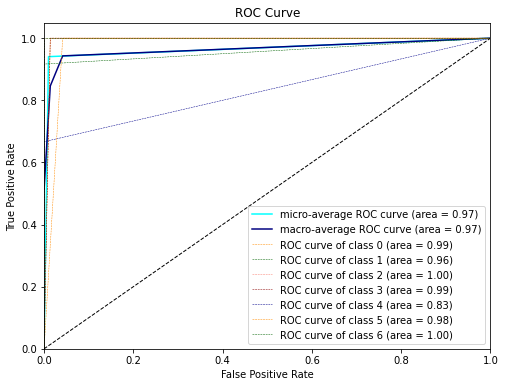

ROC curve of test set:


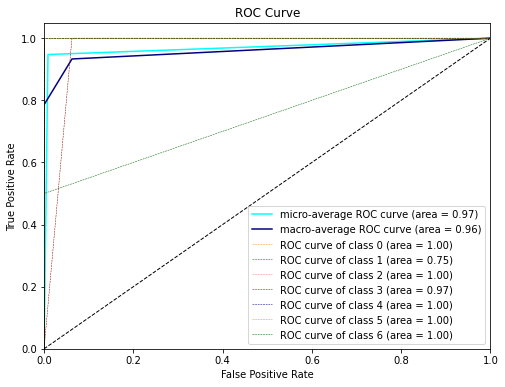

In [34]:
# fit the Gaussian Naive Bayes model on l=1
summary_df_lfold_train = split_data(train_dict,l=1)   
summary_df_lfold_test = split_data(test_dict,l=1)
    
# get train and test data
X_train = summary_df_lfold_train.iloc[:,:-1]
y_train = summary_df_lfold_train.iloc[:,-1]
X_test = summary_df_lfold_test.iloc[:,:-1]
y_test = summary_df_lfold_test.iloc[:,-1]
    
# label the data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
    
# oversample the data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define the pipeline for feature selection, scaling and classification
pipe1 = Pipeline([
    ('scale', StandardScaler()),
    ('select', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),
    ('classify', GaussianNB())
])

# Define the parameter grid for cross-validation
param_grid1 = {'classify__priors': [[0.14,0.14,0.14,0.14,0.14,0.15,0.15]]}

# Perform stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
grid_search1 = GridSearchCV(pipe1, cv=cv, param_grid=param_grid1, error_score='raise')
grid_search1.fit(X_train, y_train)
    
# Predict the test set
y_pred_train = grid_search1.best_estimator_.predict(X_train)
y_pred_test = grid_search1.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix of test set:\n', cm)

print('ROC curve of train set:')
roccurve(y_train, y_pred_train)
print('ROC curve of test set:')
roccurve(y_test, y_pred_test)

Confusion matrix of test set:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 1 0 1 0 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]
ROC curve of train set:


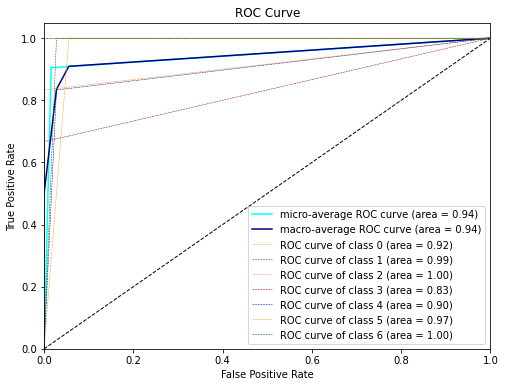

ROC curve of test set:


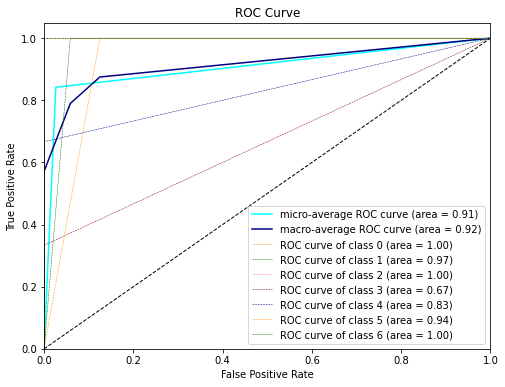

In [33]:
# fit the Multinomial Naive Bayes model on l=13
summary_df_lfold_train = split_data(train_dict,l=13)   
summary_df_lfold_test = split_data(test_dict,l=13)
    
# get train and test data
X_train = summary_df_lfold_train.iloc[:,:-1]
y_train = summary_df_lfold_train.iloc[:,-1]
X_test = summary_df_lfold_test.iloc[:,:-1]
y_test = summary_df_lfold_test.iloc[:,-1]
    
# label the data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
    
# oversample the data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define the pipeline for feature selection, scaling and classification
pipe2 = Pipeline([
    ('scale', MinMaxScaler()),
    ('select', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),
    ('classify', MultinomialNB())
])

# Define the parameter grid for cross-validation
param_grid2 = {
    'classify__alpha': [0.001, 0.01, 0.1, 1],
    'classify__fit_prior': [True, False]
}

# Perform stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
grid_search2 = GridSearchCV(pipe2, cv=cv, param_grid=param_grid2, error_score='raise')
grid_search2.fit(X_train, y_train)

# Predict the test set
y_pred_train = grid_search2.best_estimator_.predict(X_train)
y_pred_test = grid_search2.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix of test set:\n', cm)

print('ROC curve of train set:')
roccurve(y_train, y_pred_train)
print('ROC curve of test set:')
roccurve(y_test, y_pred_test)

#### iii. Which method is better for multi-class classification in this problem?

Gaussian Naive Bayes. It has highest AUC and accuracy scores.